In [52]:
# Translation
import googletrans
from googletrans import Translator


# Data Structures
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# Text processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer

# K-Means
from sklearn                          import cluster
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from sklearn.cluster                  import KMeans



# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# load data

In [53]:
df = pd.read_csv('2021_Cities_Water_Security_Risks.csv', encoding="utf-8")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Questionnaire Name                       2349 non-null   object
 1   Account Number                           2349 non-null   int64 
 2   Account Name                             2349 non-null   object
 3   Country                                  2349 non-null   object
 4   CDP Region                               2349 non-null   object
 5   ParentSection                            2349 non-null   object
 6   Section                                  2349 non-null   object
 7   Question Number                          2349 non-null   object
 8   Question Name                            2349 non-null   object
 9   Row Number                               2349 non-null   int64 
 10  Water security risk drivers              2137 non-null   obj

,Questionnaire Name,Account Number,Account Name,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
0,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Serious,NaN,The city depends on one river for water supply...
1,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,NaN,The water cost burden is felt across all ZIP c...
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...
3,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Current,Serious,Medium-high,The downscaling of the climate projections at ...
4,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Declining water quality,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...


# First, Water Security Risk Drivers

In [54]:
df1 = df[['Country','Account Name', 'CDP Region','Water security risk drivers']]
df1.dropna(inplace=True)

# Transfer any row begins with "Other" and "Question not applicable" to "Other"
df1[df1['Water security risk drivers'].str.contains('Other')] = 'Other'
df1[df1['Water security risk drivers'].str.contains('Question not applicable')] = 'Other'
df1['Water security risk drivers'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_1832\241628466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1832\241628466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1['Water security risk drivers'].str.contains('Other')] = 'Other'
C:\Users\user\AppData\Local\Temp\ipykernel_1832\241628466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Other                                               559
Increased water stress                              250
Declining water quality                             237
Inadequate or ageing water supply infrastructure    197
Increased water demand                              160
Drought                                             148
Increased water scarcity                            147
Severe weather events                               101
Higher water prices                                  89
Pollution incidents                                  46
Change in land-use                                   39
Environmental regulations                            36
Energy supply issues                                 32
Rationing of municipal water supply                  25
Ecosystem vulnerability                              20
Unauthorised/unregistered water connections          20
Increased levels of plastic in freshwater bodies     16
Water infestation/disease                       

In [55]:
# Drop the rows "Other"
df1['Risk_drivers'] = df1[["Water security risk drivers"]]
df_risk_drivers = df1[df1.Risk_drivers != 'Other'].reset_index(drop=True)
df_risk_drivers['Risk_drivers'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_1832\2321644772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Risk_drivers'] = df1[["Water security risk drivers"]]


Increased water stress                              250
Declining water quality                             237
Inadequate or ageing water supply infrastructure    197
Increased water demand                              160
Drought                                             148
Increased water scarcity                            147
Severe weather events                               101
Higher water prices                                  89
Pollution incidents                                  46
Change in land-use                                   39
Environmental regulations                            36
Energy supply issues                                 32
Rationing of municipal water supply                  25
Ecosystem vulnerability                              20
Unauthorised/unregistered water connections          20
Increased levels of plastic in freshwater bodies     16
Water infestation/disease                            15
Name: Risk_drivers, dtype: int64

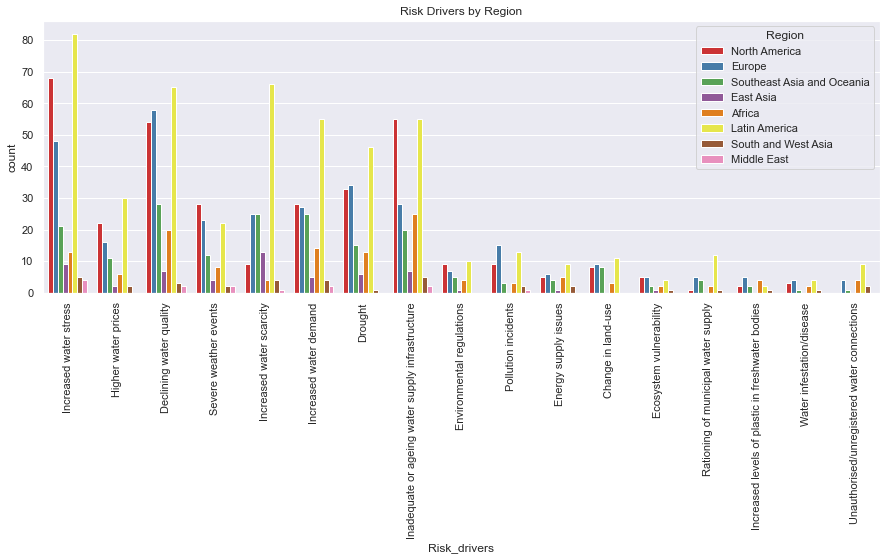

In [56]:
# Plot the Water Security risk drivers by regions
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 5))

ax= sns.countplot(hue='CDP Region',x = "Risk_drivers", data=df_risk_drivers, palette='Set1').set(title="Risk Drivers by Region")
plt.xticks(rotation=90)

plt.legend(loc='upper right', title='Region')
plt.savefig("Water_risk_drivers_by_region.png")
plt.show()

### Exploring Water Security Risk Drivers by Region/Countries

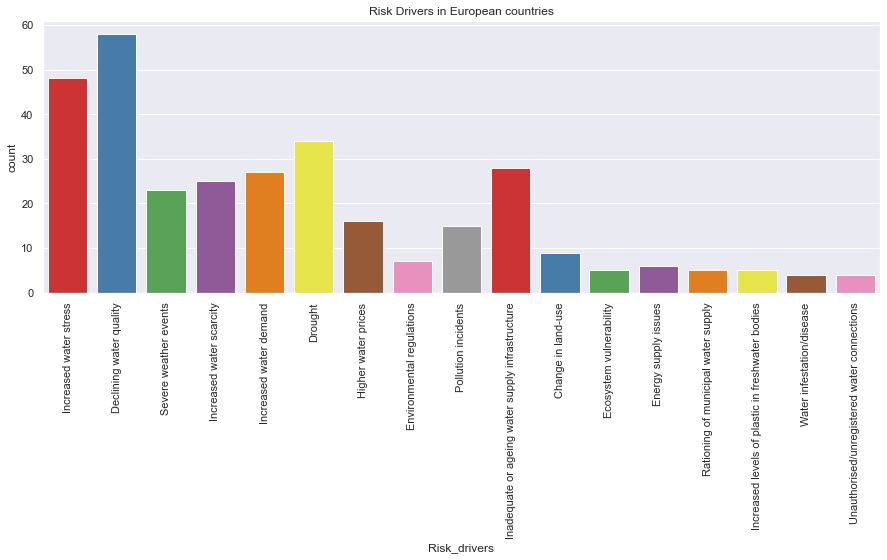

In [57]:
# Exloring Water security risk drivers in Europe
fig, ax = plt.subplots(figsize=(15, 5))

ax= sns.countplot(x = "Risk_drivers", 
                  data=df_risk_drivers[df_risk_drivers["CDP Region"]=="Europe"],
                  palette='Set1'
                 ).set(title="Risk Drivers in European countries")
plt.xticks(rotation=90)
plt.show()

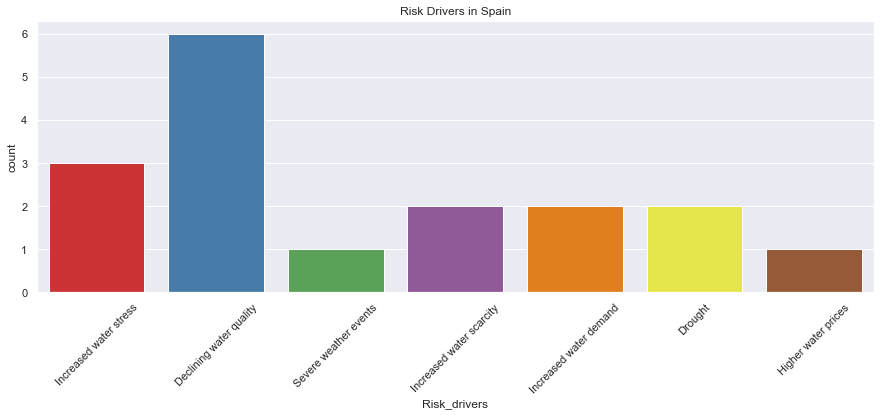

In [58]:
# Exloring water security risk drivers in Spain
df_risk_drivers[df_risk_drivers["Country"]=="Spain"]
fig, ax = plt.subplots(figsize=(15, 5))

ax= sns.countplot(x = "Risk_drivers", 
                  data=df_risk_drivers[df_risk_drivers["Country"]=="Spain"], 
                  palette='Set1'
                 ).set(title="Risk Drivers in Spain")
plt.xticks(rotation=45)
plt.show()

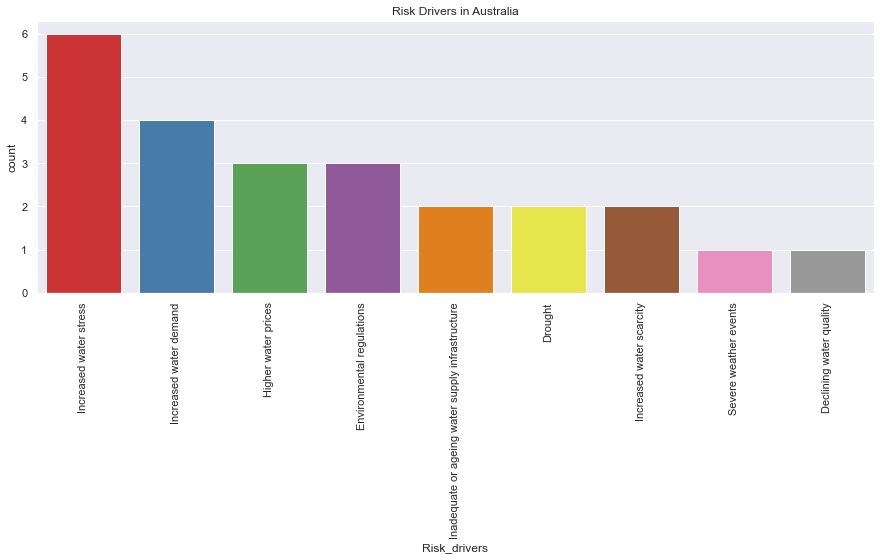

In [59]:
# Exloring water security risk drivers in Australia
df_risk_drivers[df_risk_drivers["Country"]=="Australia"]
fig, ax = plt.subplots(figsize=(15, 5))

ax= sns.countplot(x = "Risk_drivers", 
                  data=df_risk_drivers[df_risk_drivers["Country"]=="Australia"], 
                  palette='Set1'
                 ).set(title="Risk Drivers in Australia")
plt.xticks(rotation=90)
plt.show()

# Second, Risk Description

In [50]:
df = df[['Country','Account Name', 'CDP Region', 'Risk description']]

<AxesSubplot:>

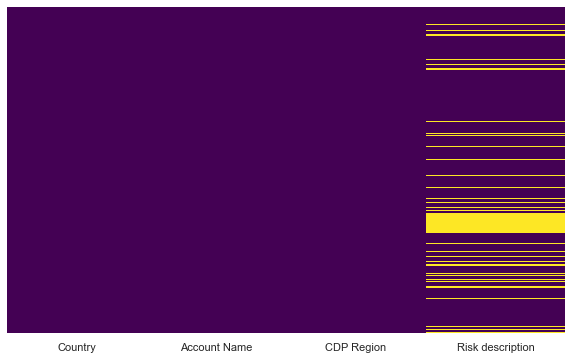

In [51]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df['description'] = df['Risk description'].map(str)
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 0 to 2348
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           1944 non-null   object
 1   Account Name      1944 non-null   object
 2   CDP Region        1944 non-null   object
 3   Risk description  1944 non-null   object
 4   description       1944 non-null   object
dtypes: object(5)
memory usage: 91.1+ KB


,Country,Account Name,CDP Region,Risk description,description
0,United States of America,"City of Atlanta, GA",North America,The city depends on one river for water supply...,The city depends on one river for water supply...
1,United States of America,"City of Atlanta, GA",North America,The water cost burden is felt across all ZIP c...,The water cost burden is felt across all ZIP c...
2,United States of America,"City of Austin, TX",North America,Central Texas is drought prone and we depend o...,Central Texas is drought prone and we depend o...
3,Spain,Ajuntament de Barcelona,Europe,The downscaling of the climate projections at ...,The downscaling of the climate projections at ...
4,Spain,Ajuntament de Barcelona,Europe,A reduction in water resources availability c...,A reduction in water resources availability c...


# TEXTING CLUSTER

First we define a function to make lowercase and  remove 'question not available'

In [13]:
def lower_na(x):
    y = x.lower()
    if y == 'question not applicable':
        return ''
    else:
        return y

In [14]:
# Transfering all text to lower cases
df['new_desc'] = df['description'].apply(lambda x: lower_na(x))
df.head()

,Country,Account Name,CDP Region,Risk description,description,new_desc
0,United States of America,"City of Atlanta, GA",North America,The city depends on one river for water supply...,The city depends on one river for water supply...,the city depends on one river for water supply...
1,United States of America,"City of Atlanta, GA",North America,The water cost burden is felt across all ZIP c...,The water cost burden is felt across all ZIP c...,the water cost burden is felt across all zip c...
2,United States of America,"City of Austin, TX",North America,Central Texas is drought prone and we depend o...,Central Texas is drought prone and we depend o...,central texas is drought prone and we depend o...
3,Spain,Ajuntament de Barcelona,Europe,The downscaling of the climate projections at ...,The downscaling of the climate projections at ...,the downscaling of the climate projections at ...
4,Spain,Ajuntament de Barcelona,Europe,A reduction in water resources availability c...,A reduction in water resources availability c...,a reduction in water resources availability c...


In [15]:
# Doing translaion the text to English
translator = Translator()
df['translated_value'] = df['new_desc'].apply(lambda x: translator.translate(x, dest='en').text)

In [16]:
# Merging all cities have the same country
df['translated_value']=df['translated_value'].apply(lambda x: x+ ' ')
aggregation_functions = {'translated_value': 'sum'}
df2 = df.groupby(df['Country']).aggregate(aggregation_functions)
df2 = df2.reset_index()
df2.head()

,Country,translated_value
0,Argentina,snowfall in high mountains is scarce and the ...
1,Australia,melbourne water analysed the effect of greater...
2,Bangladesh,crysis of drinking water increases water born ...
3,Belgium,agriculture: increased water needs and risk of...
4,Bolivia (Plurinational State of),because from the same source it is used for...


In [17]:
len(df2)

87

There are 87 countries in the dataset. Now we have country level data with combined risk description. Idea is to cluster the countries based on the risk description.

## We apply the TF-IDF fuction for text clustering
We apply the TF-IDF function, short for term frequency inverse document frequency, which is a numerical statistic that's intended to reflect how important a word is to a document in a corpus by giving each word in a document a score that ranges from 0 to 1.

In [18]:
corpus = df2['translated_value'].to_list()

In [19]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord


In [20]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language) + ['water']
    param_stemmer = SnowballStemmer(language)

    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
             
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        
        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [21]:
# Processing corpus
language = 'english'
new_corpus = processCorpus(corpus, language)

In [22]:
# We make new column in df2 as named corpus
df2['corpus'] = new_corpus
df2.head()

,Country,translated_value,corpus
0,Argentina,snowfall in high mountains is scarce and the ...,snowfal high mountain scarc amount meltwat exp...
1,Australia,melbourne water analysed the effect of greater...,melbourn analys effect greater consumpt caus p...
2,Bangladesh,crysis of drinking water increases water born ...,crysi drink increas born diseas
3,Belgium,agriculture: increased water needs and risk of...,agricultur increas need risk stress pollut gro...
4,Bolivia (Plurinational State of),because from the same source it is used for...,sourc use agricultur livestock human consumpt ...


**Statistical Weighting of Words**

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

87 rows


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
atuel,0.232756,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
diamant,0.232756,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
hydroelectr,0.213030,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.000000,0.0,0.009518,0.000000,0.0,0.0,0.0,0.0
system,0.179012,0.032857,0.0,0.0,0.000000,0.102794,0.0,0.0,0.0,0.053079,...,0.24112,0.0,0.023125,0.0,0.083982,0.000000,0.0,0.0,0.0,0.0
basin,0.164305,0.022618,0.0,0.0,0.076679,0.159982,0.0,0.0,0.0,0.000000,...,0.00000,0.0,0.000000,0.0,0.016518,0.185585,0.0,0.0,0.0,0.0


## k means

In [24]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')
        kmeans_results.update( {k : kmeans.fit(data)} )      
    return kmeans_results

**Silhouette Score**: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [26]:
best_clusters = 0 
previous_silh_avg = 0.0
for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters, init='k-means++', random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels, sample_size=87)
    if silhouette_avg > previous_silh_avg:
        previous_silh_avg = silhouette_avg
        best_clusters = n_clusters
print("No of Clusters:", best_clusters)

# K-Means Implementation
num_clusters = best_clusters  
km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=1)  
km.fit(X)  

clusters = km.labels_.tolist()  
df2['label'] = clusters  
print("Cluster Count")
print(df2['label'].value_counts())

No of Clusters: 2
Cluster Count
0    47
1    40
Name: label, dtype: int64


There are 47 countries in the cluster 1, and 40 countries in cluster 2.

In [27]:
#show more rows
pd.set_option('display.max_rows', 100)

In [28]:
# Countries in the first cluster
df2[df2['label'] == 0]

,Country,translated_value,corpus,label
0,Argentina,snowfall in high mountains is scarce and the ...,snowfal high mountain scarc amount meltwat exp...,0
2,Bangladesh,crysis of drinking water increases water born ...,crysi drink increas born diseas,0
3,Belgium,agriculture: increased water needs and risk of...,agricultur increas need risk stress pollut gro...,0
8,Burundi,not severe,sever,0
12,China,,,0
13,"China, Hong Kong Special Administrative Region","hong kong is an international city, reliable w...",hong kong intern citi reliabl suppli essenti d...,0
16,Croatia,,,0
17,Côte d'Ivoire,increase in water demand linked to urban spraw...,increas demand link urban sprawl groundwat pol...,0
18,Democratic Republic of the Congo,disappearance of water catchment sites f...,disappear catchment site follow anarch illeg c...,0
21,Eswatini,the incidence of drought is projected to be mo...,incid drought project frequent due climat chan...,0


In [29]:
# Countries in the second cluster
df2[df2['label'] == 1]

,Country,translated_value,corpus,label
1,Australia,melbourne water analysed the effect of greater...,melbourn analys effect greater consumpt caus p...,1
4,Bolivia (Plurinational State of),because from the same source it is used for...,sourc use agricultur livestock human consumpt ...,1
5,Brazil,two scenarios were studied with current climat...,two scenario studi current climat pattern dema...,1
6,Bulgaria,the population of the city is constantly incre...,popul citi constant increas main sourc surfac ...,1
7,Burkina Faso,regular flooding causing the destruction of dr...,regular flood caus destruct drink suppli infra...,1
9,Cameroon,the lack of drinking water forces the populati...,lack drink forc popul consum poor qualiti dist...,1
10,Canada,reduced snowpack in winter could reduce storag...,reduc snowpack winter could reduc storag reser...,1
11,Chile,"the underground aquifers are drying up, especi...",underground aquif dri especi northwest sector ...,1
14,Colombia,there could be a risk on the resource availabi...,could risk resourc avail popul comparison curr...,1
15,Costa Rica,risk is high because projects are needed to pr...,risk high project need provid metropolitan aqu...,1


**We apply the Wordclouds to show the most popular words in each cluster.**

In [30]:
# First, we define the function
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

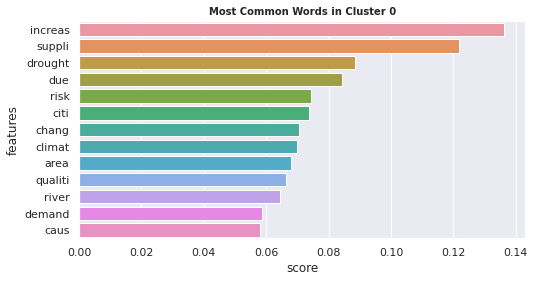

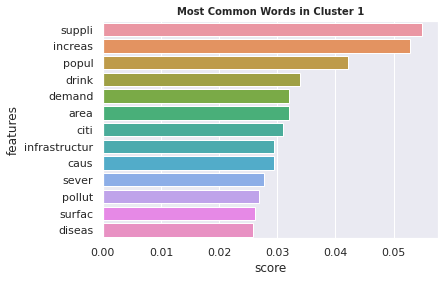

In [31]:
# Running Kmeans
k = 2
kmeans_results = run_KMeans(k, final_df)

# Plot common words
best_result =2
kmeans = kmeans_results.get(best_result)
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [32]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )
    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure(figsize=(15,6))
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

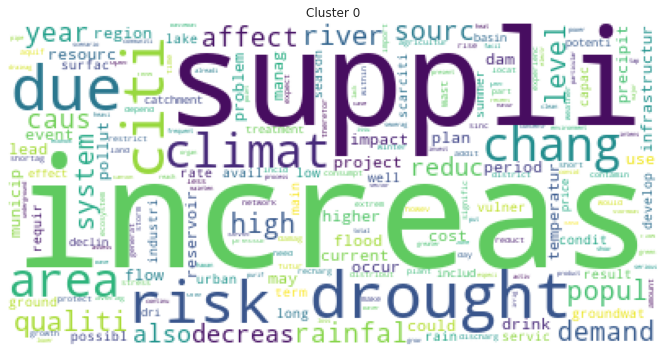

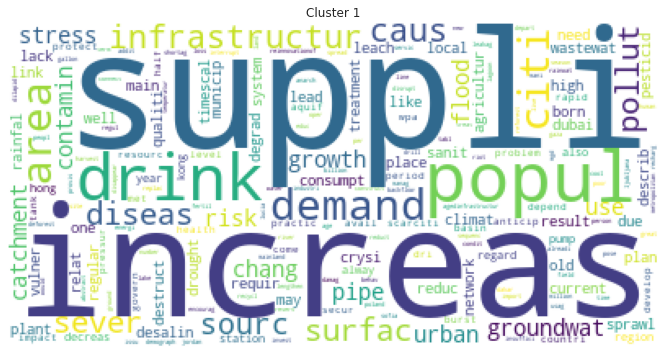

In [33]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)